# Task 2

Task description:
a) Load the tree height data below using any Python environment and libraries you wish. 
b) Summarize the data and 
c) indicate any potential issues.  
Please provide:
d) the code and any 
e) notes, 
f) charts or
g) tables you created.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset, paste your path to file in the first line of code between to '' 
path = r'C:/Users/Jared/Dropbox/WORK/EMAPSITE/emapsite_test_data.csv'
df = pd.read_csv(path)

Below I was trying to load the dataset which I manually edited (added letters to some values). I cannot load this dataset due to below error.
I did it to check if the original dataset could contain some not visible for me, at the first glance, not-numbers.

In [9]:
df2 = pd.read_csv(path2)

C:\Users\Jared\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Check dataset dimensions
df.shape

(2555137, 1)

Dataset contains one column with milions of rows.

In [5]:
# Check dataset header name and first few values
df.head()

,val
0,17.241
1,5.366
2,10.643
3,5.916
4,15.554


The column name is 'val'. Dataset contains float numbers.

In [6]:
# Check null values across the dataset
print(df.isnull().sum())

val    0
dtype: int64


No missing values found across dataset.

In [7]:
# Setting decimal places display to look more human friendly, just 2 should be probably the best.
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
# Check initial dataset parameters
df.describe()

,val
count,"2,555,137.00"
mean,11.35
std,6.62
min,0.62
25%,5.73
50%,10.13
75%,16.13
max,45.00


There are 2,555,137 rows in dataset.
The mean value is 11.35
The standard devation is 6.62
The lowest value is 0.62
The highest value is 45.00
Quartiles end at the following values: 
1 - 5.73
2 - 10.13 (median values)
3 - 16.13

In [9]:
# Check for 5 highest values across dataset
df.sort_values('val', ascending=False).head(5)

,val
424940,45.00
1446146,44.99
1190729,44.98
985901,44.98
2519566,44.95


In [10]:
# Check for 5 lowest values across dataset
df.sort_values('val', ascending=False).tail(5)

,val
867244,0.84
204398,0.83
254559,0.80
2009732,0.75
1787044,0.62


# Charts

I decided to choose seaborn and matplotlib as I'm familar with these libraries, as well as plotly.

In [11]:
# Setting background grid for charts, to perform more accurate observations.
sns.set_style("whitegrid")

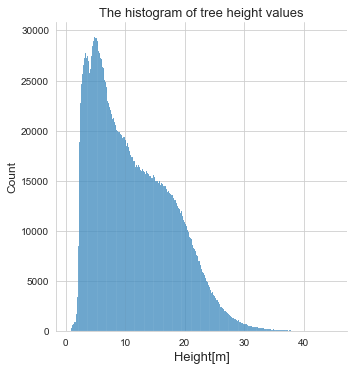

In [12]:
# Plotting univariate histogram
sns.displot(df, x='val') # plotting histogram, df is dataset name, x='val' is a value name
plt.title('The histogram of tree height values', fontsize=13) # adding title
plt.xlabel('Height[m]', fontsize=13) # adding x axis label
plt.ylabel('Count', fontsize=12) # adding y axis label
plt.show() # display figure

Data distribution for the above chart looks undisturbed.
I can't see any suspicious spikes in the data, or anything else that requires my attention.
Histogram has skew right distribution.
Dataset represents continuous numeric values in a range from approximately 0.5 to 40 (grid is still shown in the background, thereby I can say that there are some values till ~45).
It is worth to mention that geospatial location of dataset is unknown, hence I can't predict details related to features.

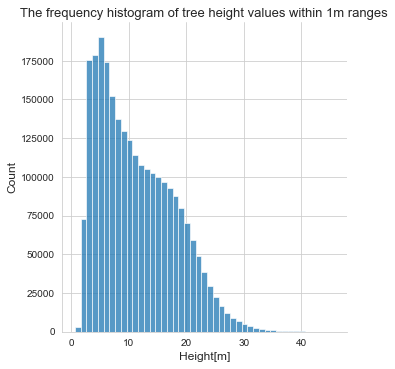

In [13]:
# Plotting univariate histogram within 1m bins (bindwith is 1)
sns.displot(df, x='val', binwidth=1)
plt.title('The frequency histogram of tree height values within 1m ranges', fontsize=13)
plt.xlabel('Height[m]', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Above chart comprises bins which contain values for each 1m interval, starting from 0.
The most common tree height is between 4 and 5m.
From range 0-1 to range 4-5 there are more and more values per bin.
From 4-5 range to end of X axis there are fewer and fewer values per bin.

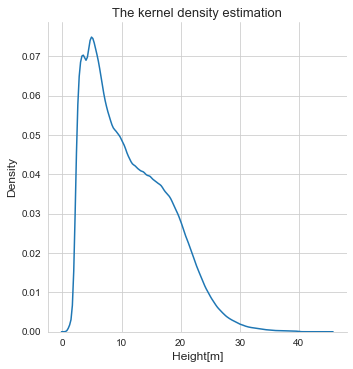

In [14]:
# Plotting density of values distribution
# Choosing the smoothing bandwidth as kernel density estimation, which stands for kind = 'kde' below
sns.displot(df, x="val", kind="kde", bw_adjust=0.75)
# the higher the bw_adjust value, the more smoothed estimation line
plt.title('The kernel density estimation', fontsize=13)
plt.xlabel('Height[m]', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

Above chart represents density of values across the whole dataset, smoothed with 0.75 parameter.
At this chart we can see that value maximum can be found around approximately 45, what can't be observed that easily for first 2 charts.

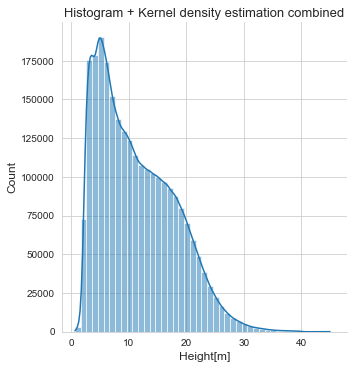

In [15]:
# Plotting 2 previous charts together by setting kde to True
sns.displot(df, x='val', binwidth=1, kde = True)
plt.title('Histogram + Kernel density estimation combined', fontsize=13)
plt.xlabel('Height[m]', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

KDE line fits well to top of the histogram's bins.

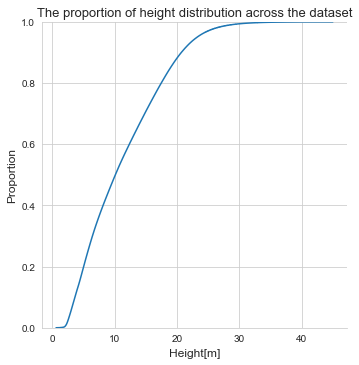

In [16]:
# Cumulative chart of values distribution.
sns.displot(df, x="val", kind="ecdf") # kind="ecdf" is responsible for type of chart
plt.title('The proportion of height distribution across the dataset', fontsize=13)
plt.xlabel('Height[m]', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

Above chart shows proportions of distribution across dataset.
Approximately 50% of trees are lower than 10m (can be compared with the 2nd quartile).
Approximately 90% of trees are lower than 20m.

# General observations

Different number of decimal (significant) places across values (from 1 to 5 decimal places).
Dataset contains duplicates, but it is normal for this kind of datasets, hence no duplicates remove is required (it's not a only unique values dataset).
No dataset scaling or normalisation is required as data represent real life numbers measured in proper way.
No outliers and suspicious values were detected. some values really low. As far as I remember height max values were between 2 and 60m, hence for this dataset values presented can belong do group of min, or less possible mean values.